In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# for converting currency to int
from decimal import Decimal
from re import sub

In [3]:
#input_file = "data.csv"
input_file= os.path.join('BC-United','Resources','data.csv')
data_df = pd.read_csv(input_file)

In [4]:
total_players=data_df['ID'].nunique()
total_players

18207

In [5]:
#data_df.isnull().sum()

In [6]:
new_df=data_df.drop([ 'Release Clause','Loaned From', 'Joined'], axis='columns')
new_df.drop(new_df.columns[26:52], axis=1, inplace=True)
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [7]:
new_df.isnull().sum()
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
#new_df.dropna(axis = 0, how ='any', inplace = True)
new_df=new_df.dropna()
new_df.isnull().sum()
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
# changing Wage to int
wage_value=[]

for wage in new_df['Wage']:
    string_val = sub(r'[^\d.]', '000', wage)
    wage_value.append(string_val)

new_df['Wage'] = wage_value
new_df['Wage'] = new_df['Wage'].astype(int)


In [10]:
type(new_df['Wage'][0])

numpy.int32

In [11]:
wage_df = new_df[['ID','Name','Wage']]
wage_df.dropna()
wage_df.head(10)
print(wage_df["Wage"].head())

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int32


In [12]:
# Sorting player wages in descending order
wage_df.sort_values(inplace=True,by='Wage', ascending=False)
wage_df.head(10)

C:\Users\slake\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Name,Wage
0,158023,L. Messi,565000
7,176580,L. Suárez,455000
6,177003,L. Modrić,420000
1,20801,Cristiano Ronaldo,405000
8,155862,Sergio Ramos,380000
4,192985,K. De Bruyne,355000
36,173731,G. Bale,355000
11,182521,T. Kroos,355000
32,189242,Coutinho,340000
5,183277,E. Hazard,340000


In [13]:

# type(wage_df['Wage'][0])
#wage_df["Name"]

# Create top 10 wage earner df

wage_df.reset_index(drop=True, inplace=True)
top10_df = wage_df.loc[0:10] 
print(top10_df)

        ID               Name    Wage
0   158023           L. Messi  565000
1   176580          L. Suárez  455000
2   177003          L. Modrić  420000
3    20801  Cristiano Ronaldo  405000
4   155862       Sergio Ramos  380000
5   192985       K. De Bruyne  355000
6   173731            G. Bale  355000
7   182521           T. Kroos  355000
8   189242           Coutinho  340000
9   183277          E. Hazard  340000
10  197781               Isco  315000


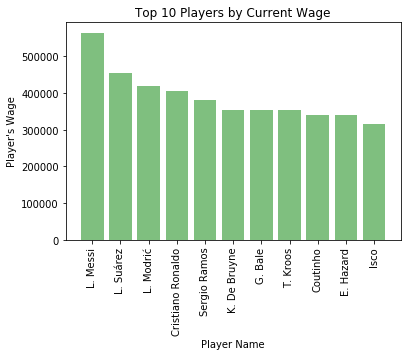

In [16]:
# Create bar chart for highest paid players
player_name=top10_df["Name"]

player_wage = top10_df["Wage"]

x_axis = np.arange(len(player_name))
plt.bar(x_axis,player_wage, color='g', alpha=0.5, align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, player_name, rotation="vertical")

plt.title("Top 10 Players by Current Wage")
plt.xlabel("Player Name")
plt.ylabel("Player's Wage")
plt.savefig("PlayerWage.png")

In [ ]:
total_players_new=new_df['ID'].nunique()

In [ ]:
# 1. Create bins for player age groups and correlate with salary/wages
age_bins = [15, 20, 25, 30, 35,40,50]
age_groups = ["16-20", "21-25","26-30","31-35","36-40","41-45"]

# purchase_data["Age Range"] = pd.cut(purchase_data["Age"],age_bins,labels = group_names)
# purchase_data.head()

In [ ]:
age_range_df = pd.DataFrame(new_df)
age_range_df['Age Range'] = pd.cut(age_range_df["Age"],age_bins,labels = age_groups)
age_range_df = age_range_df[['ID','Name','Age','Age Range','Wage','Value']]

age_range_df.head()

In [ ]:
age_analysis_df = pd.DataFrame(age_range_df.groupby(['Age Range']).count())

age_analysis_df['Total Wage'] = age_range_df.groupby(['Age Range'])[['Wage']].sum()
#age_analysis_df['Mean Value'] = age_range_df.
age_analysis_df

# age_range_df